### Setup: Importing Libraries

We begin by importing the necessary Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

We load the HR dataset containing employee records, including features like satisfaction level, evaluation score, number of projects, average monthly hours, and whether the employee left the company. This dataset will be used to explore patterns that may explain employee attrition.

In [2]:
df0 = pd.read_csv('HR_comma_sep.csv')
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Dataset Structure

We inspect the structure of the dataset using .info() to confirm the number of entries, data types, and the absence of missing values.

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Summary Statistics

We review the summary statistics of the dataset to understand the distribution of each feature. It helps identify potential outliers and gives a general sense of feature ranges before further analysis.

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Column Cleanup

We check the column names and rename several of them for consistency and clarity:
- Work_accident → work_accident
- average_montly_hours → average_monthly_hours
- time_spend_company → tenure
- Department → department

This ensures standardized naming for easier reference in later steps.


In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'
                          })

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Missing Values Check

We confirm that there are no missing values in the dataset. This means we can proceed without needing to fix or remove any rows or columns due to null values.

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Duplicate Rows Check and Removal

We detect and remove 3,008 duplicate rows from the dataset to ensure that our analysis is not biased by repeated entries. After dropping duplicates, we confirm that no duplicates remain.

In [8]:
df0.duplicated().sum()

np.int64(3008)

In [9]:
df1 = df0.drop_duplicates(keep='first')
df1.duplicated().sum()

np.int64(0)

### Target Variable Distribution: Employee Attrition

We analyze the distribution of the target variable left, which indicates whether an employee left the company (1) or stayed (0). 

The data shows:
- **10,000 employees stayed** (83.4%)
- **1,991 employees left** (16.6%)

In [10]:
print(df1['left'].value_counts())

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Exploratory Analysis: Attrition by Feature

We explore how each feature relates to the probability of an employee leaving the company by visualizing both absolute counts and normalized proportions (left vs stayed).

- For categorical/discrete variables (e.g., number of projects, tenure), we use bar plots.
- For continuous variables (e.g., satisfaction level), we use histograms.

Both grouped and stacked formats are shown to highlight total employee counts and proportions of those who left.

In [11]:
def bar_plot_comparison(df, column_name, column_title):
  grouped = df.groupby([column_name, 'left']).size().unstack(fill_value=0)
  normalized = grouped.div(grouped.sum(axis=1), axis=0)
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Left: Grouped Bar Chart (Absolute Counts)
  grouped.plot(
      kind='bar',
      ax=axes[0],
      color=['#1f77b4', '#ff7f0e']
  )
  axes[0].set_title(f'Employee Count by {column_title}')
  axes[0].set_xlabel(column_title)
  axes[0].set_ylabel('Count')
  axes[0].legend(title='Left', labels=['Stayed', 'Left'])
  axes[0].grid(axis='y', linestyle='--', alpha=0.7)

  # Right: Stacked Normalized Bar Chart (Proportions)
  normalized.plot(
      kind='bar',
      stacked=True,
      ax=axes[1],
      color=['#1f77b4', '#ff7f0e']
  )
  axes[1].set_title(f'Proportion of Employees Leaving by {column_title}')
  axes[1].set_xlabel(column_title)
  axes[1].set_ylabel('Proportion')
  axes[1].legend(title='Left', labels=['Stayed', 'Left'])
  axes[1].grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()


In [12]:
def histogram_comparison(df, column_name, column_title):
  # Bin settings
  bins = np.linspace(df1[column_name].min(), df1[column_name].max(), 20)
  fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

  # Left: Grouped histogram (Absolute Counts)
  axes[0].hist(
      [df1[df1['left'] == 0][column_name], df1[df1['left'] == 1][column_name]],
      bins=bins,
      color=['#1f77b4', '#ff7f0e'],
      label=['Stayed (0)', 'Left (1)'],
      stacked=False,
      alpha=0.7
  )
  axes[0].set_title(f'Distribution of Emplyees by {column_title}')
  axes[0].set_xlabel(column_title)
  axes[0].set_ylabel('Count')
  axes[0].legend()
  axes[0].grid(axis='y', linestyle='--', alpha=0.7)

  # Right Stacked Normalized Histogram (Proportions)
  # Calculate counts per bin
  hist_0, _ = np.histogram(df1[df1['left'] == 0][column_name], bins=bins)
  hist_1, _ = np.histogram(df1[df1['left'] == 1][column_name], bins=bins)
  total = hist_0 + hist_1

  # Avoid division by zero
  total[total == 0] = 1
  normalized_0 = hist_0 / total
  normalized_1 = hist_1 / total

  axes[1].bar(bins[:-1], normalized_0, width=np.diff(bins), color='#1f77b4', label='Stayed (0)', align='edge')
  axes[1].bar(bins[:-1], normalized_1, width=np.diff(bins), bottom=normalized_0, color='#ff7f0e', label='Left (1)', align='edge')

  axes[1].set_title(f'Proportion of Emplyees leaving by {column_title}')
  axes[1].set_xlabel(column_title)
  axes[1].set_ylabel('Proportion')
  axes[1].legend()
  axes[1].grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()


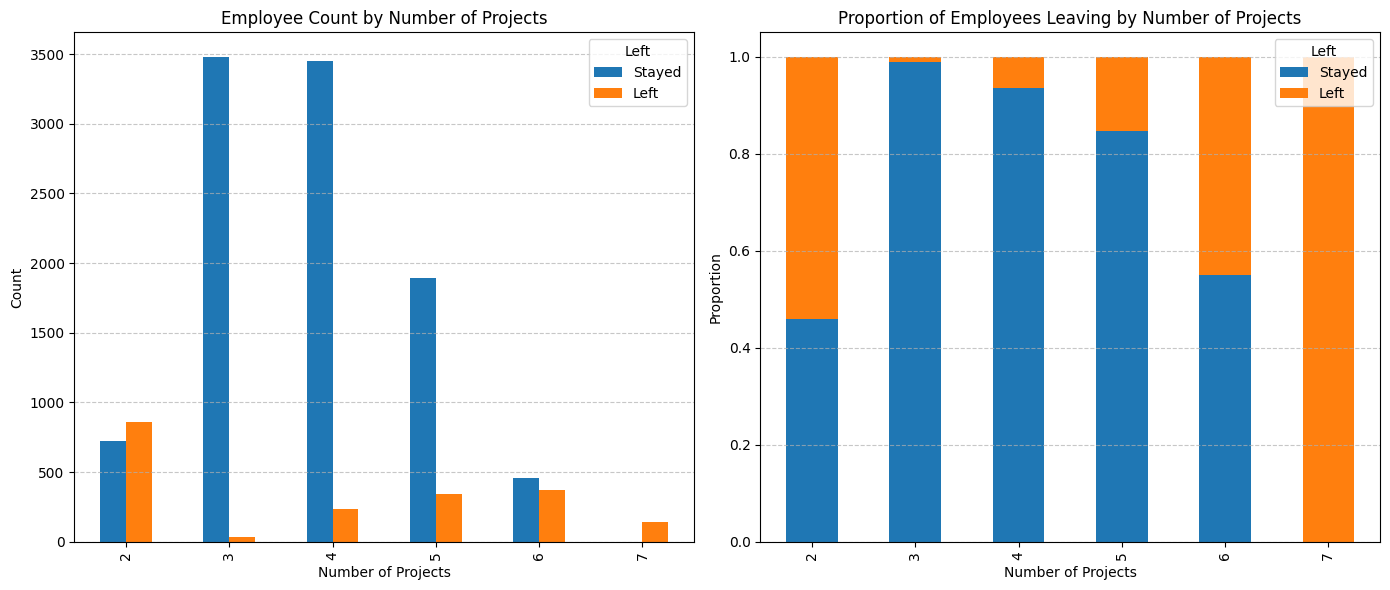

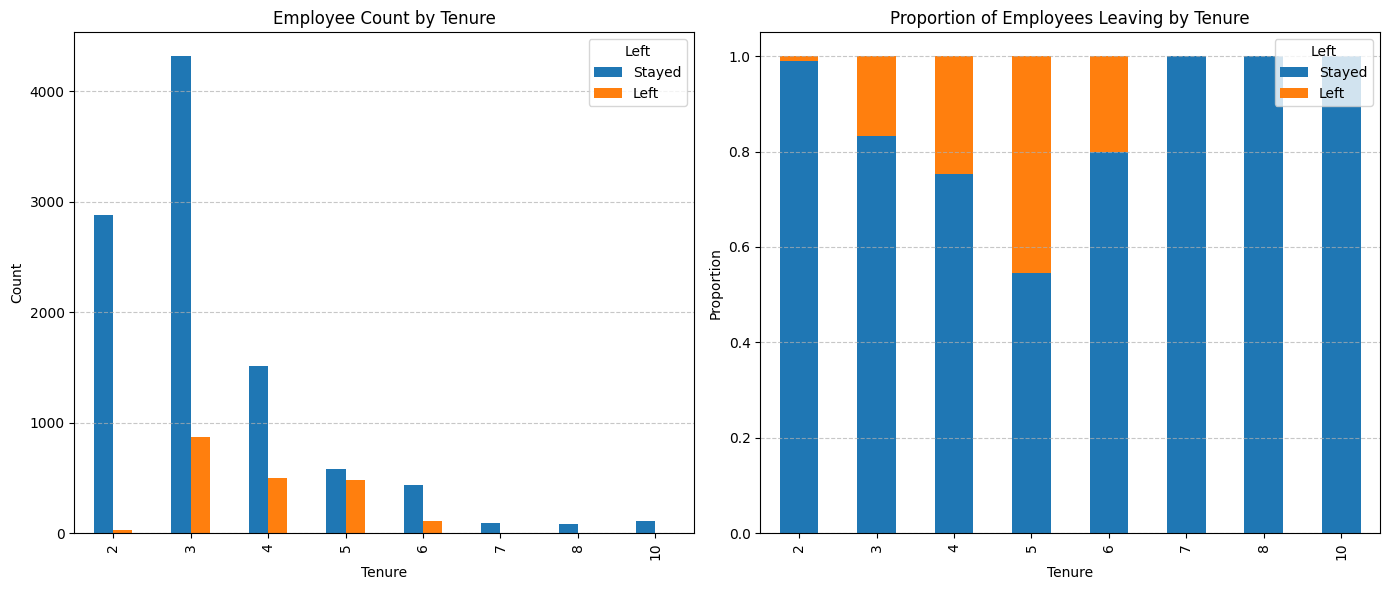

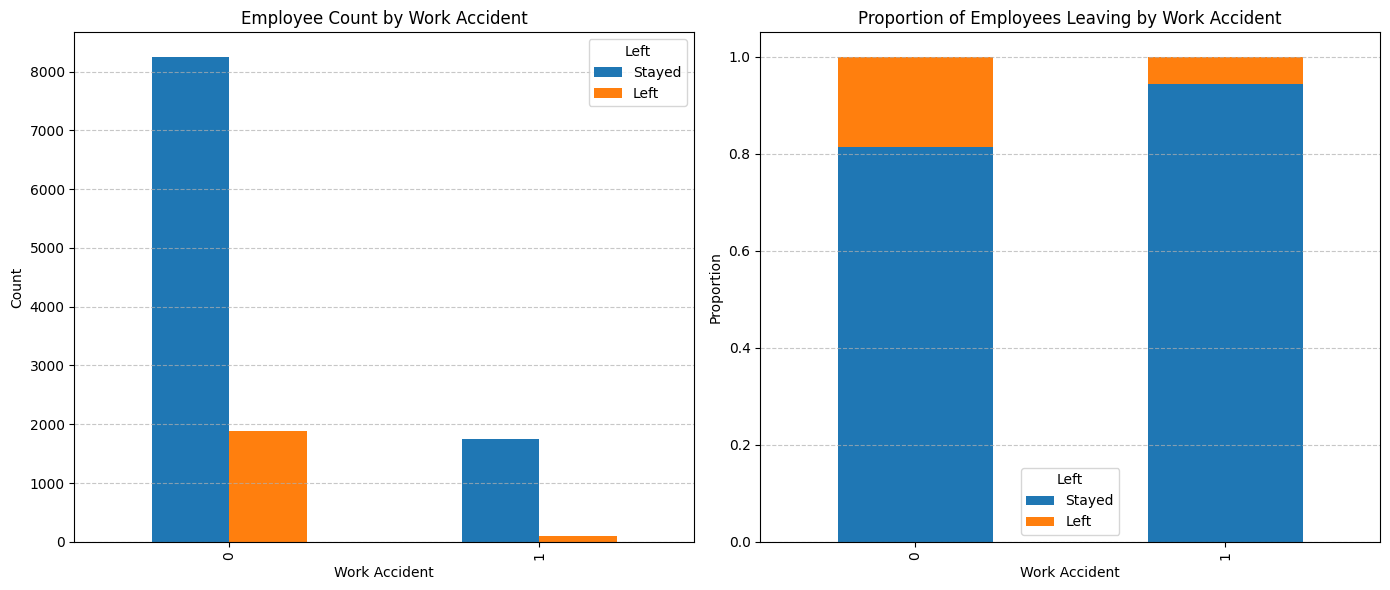

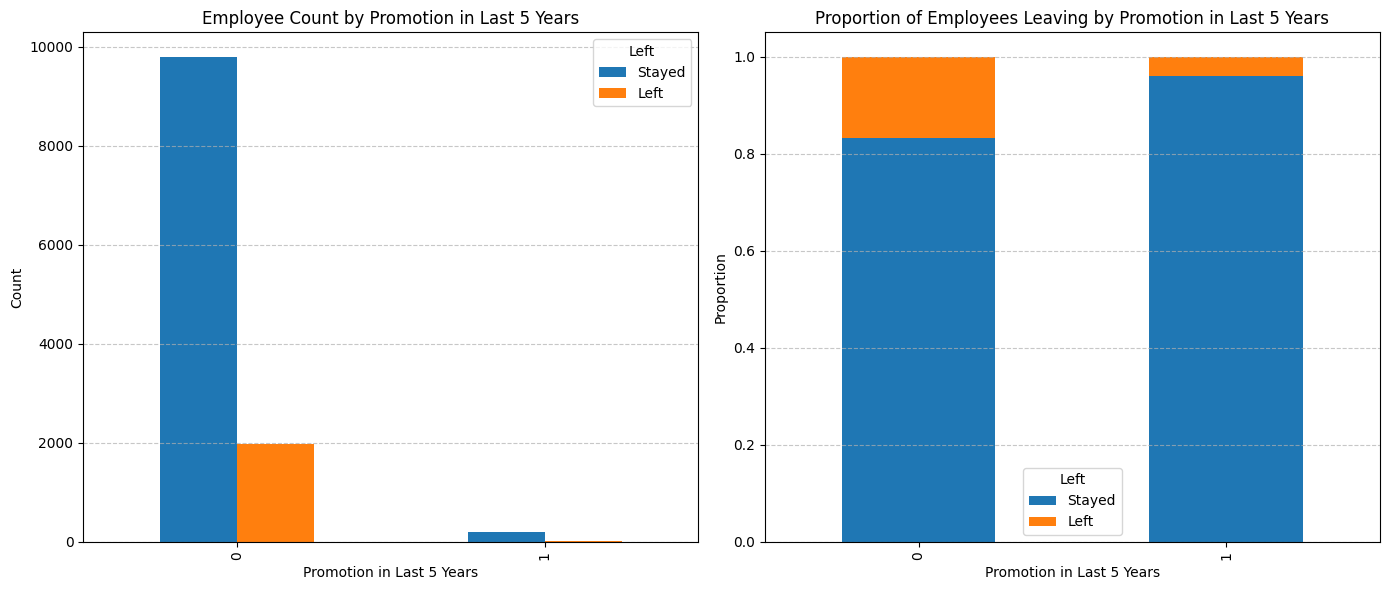

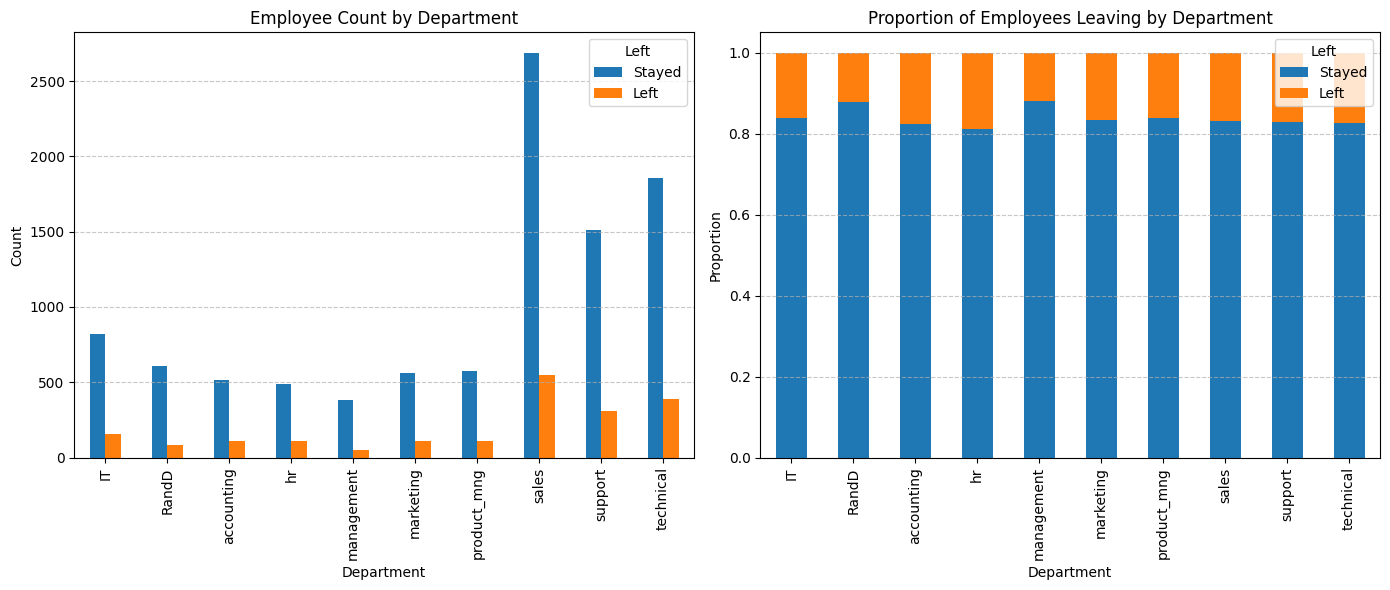

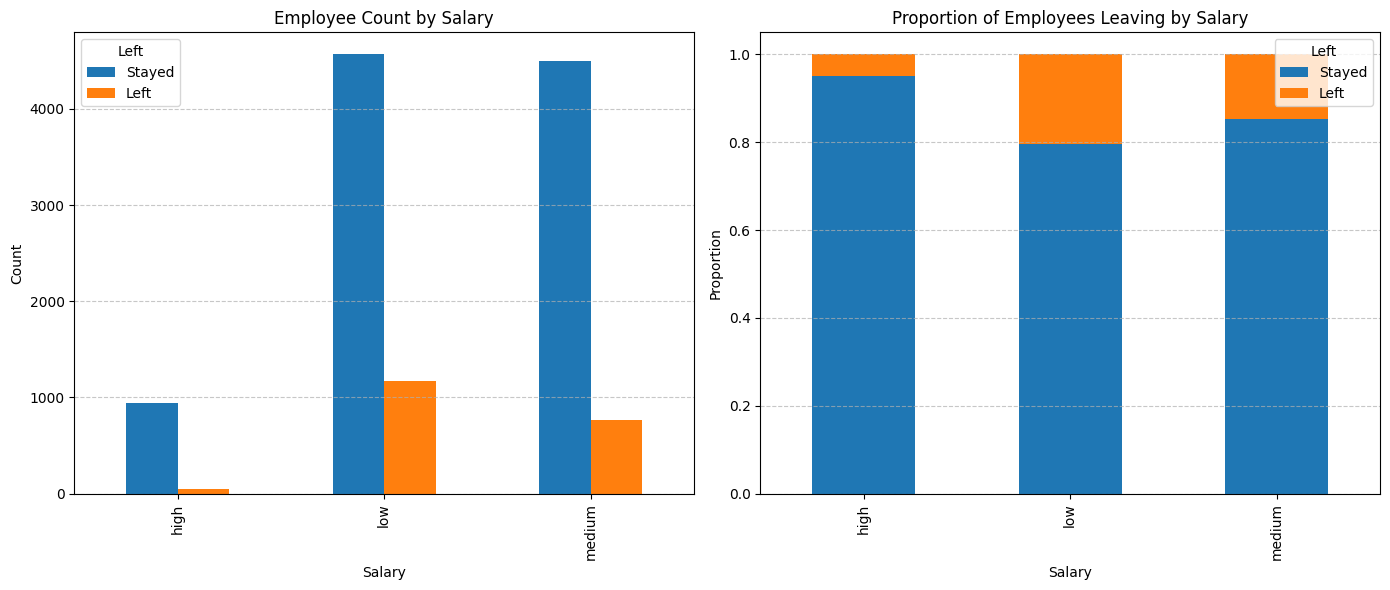

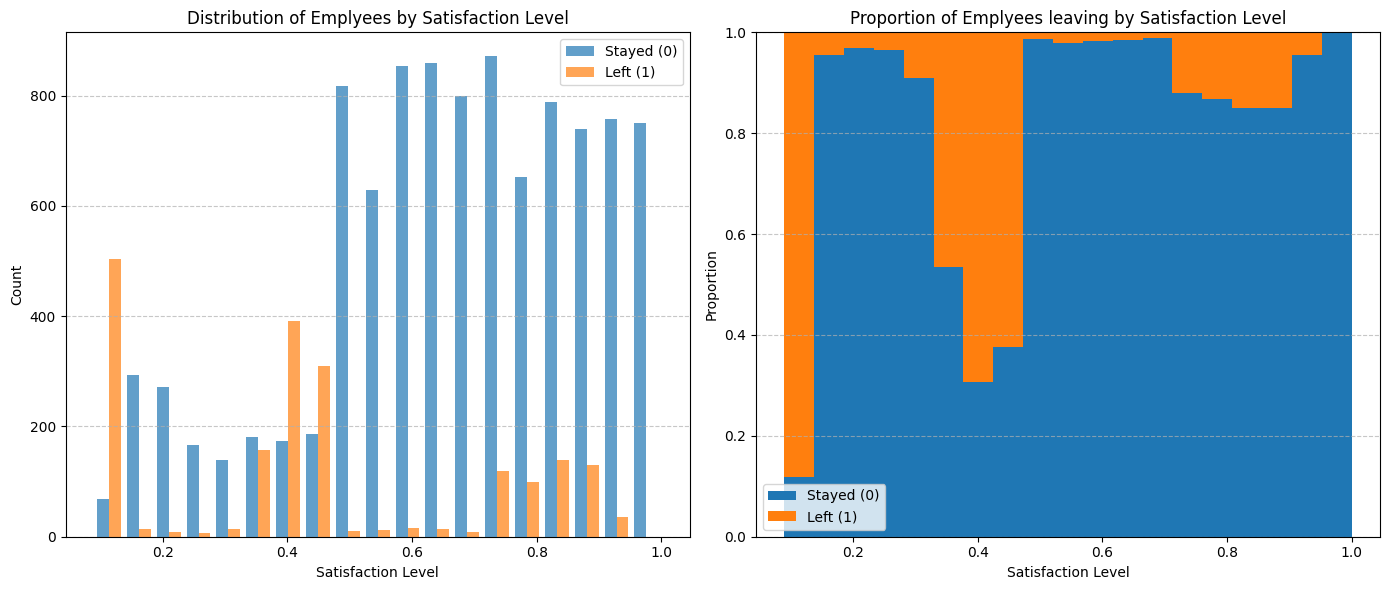

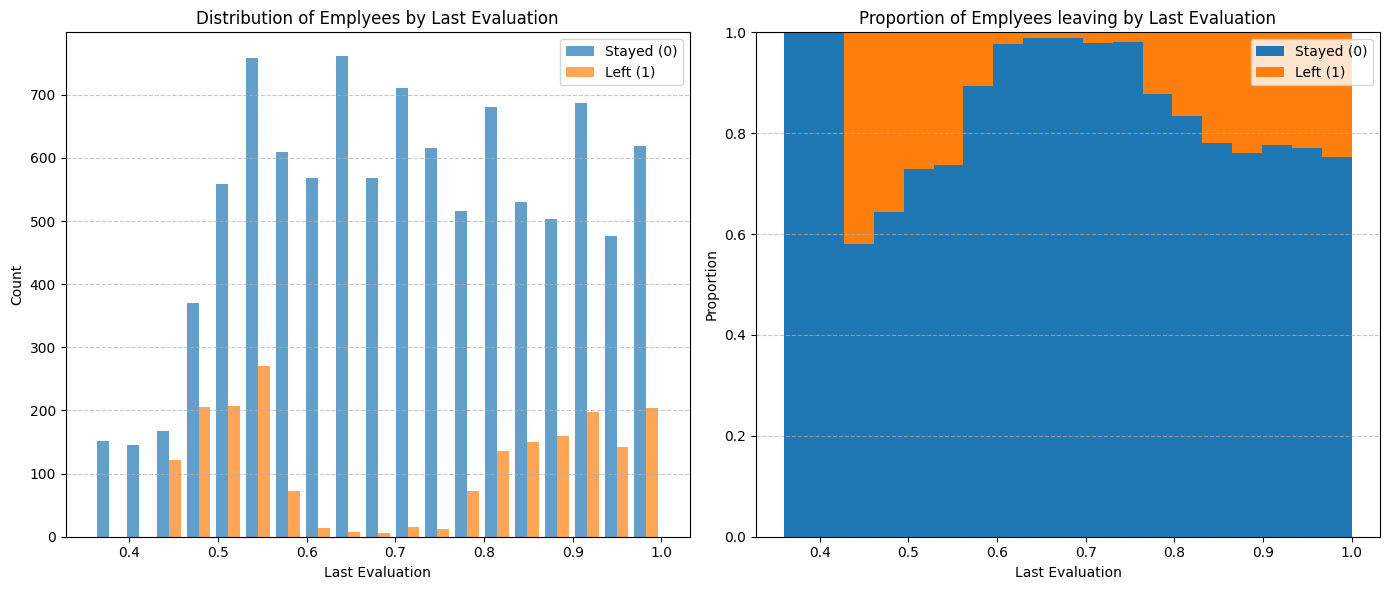

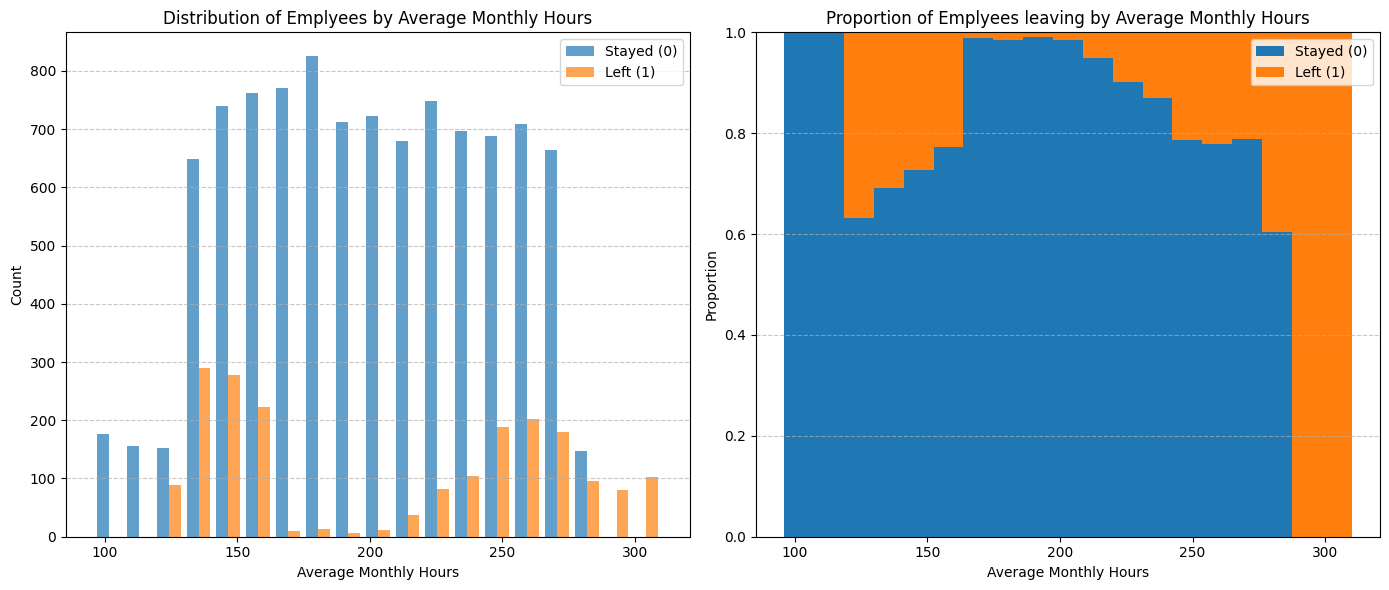

In [13]:
column_names = ['number_project', 'tenure', 'work_accident', 'promotion_last_5years', 'department', 'salary']
column_titles = ['Number of Projects', 'Tenure', 'Work Accident', 'Promotion in Last 5 Years', 'Department', 'Salary']

for column_name, column_title in zip(column_names, column_titles):
  bar_plot_comparison(df1, column_name, column_title)

column_names = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']
column_titles = ['Satisfaction Level', 'Last Evaluation', 'Average Monthly Hours']

for column_name, column_title in zip(column_names, column_titles):
  histogram_comparison(df1, column_name, column_title)

### Key Observations

From the distribution plots, several patterns emerge (remember that overall left rate is 17%):

- **Number of Projects**: Employees with 2 or 6 projects have higher attrition (~50%), and all employees with 7 projects left the company.
- **Tenure**: Employees with exactly 5 years at the company left at an unusually high rate (~45%).
- **Satisfaction Level**: Extremely low satisfaction (0.0–0.1) is strongly associated with attrition (~90% left). Moderate dissatisfaction (0.3–0.5) also shows higher departure rates (50–60%).
- **Last Evaluation**: Moderate-low evaluation scores (0.45–0.5) correlate with higher likelihood of leaving (~40%).
- **Average Monthly Hours**: Low (120–140) and very high workloads (270+) are linked to elevated attrition. All employees with >270 hours left.

These trends suggest that both disengaged and overworked employees are at high risk of leaving.


### Scatterplot Analysis of Continuous Variables

To better understand relationships between continuous features and employee attrition, scatterplots are generated for each pair of variables:

- Points representing employees who left are highlighted in orange.
- Those who stayed are shown in blue with lower opacity for contrast.

This visualization aims to reveal clusters or patterns in feature interactions associated with higher attrition.

In [42]:
def scatter_plot_comparison(df, column_name_X, column_name_Y, column_title_X, column_title_Y):

  plt.figure(figsize=(16, 9))

  # Plot left = 0 (faded)
  plt.scatter(
      df1[df1['left'] == 0][column_name_X],
      df1[df1['left'] == 0][column_name_Y],
      color='#1f77b4',
      label='Stayed',
      alpha=0.2,
  )

  # Plot left = 1 (highlighted)
  plt.scatter(
      df1[df1['left'] == 1][column_name_X],
      df1[df1['left'] == 1][column_name_Y],
      color='#ff7f0e',
      label='Left',
      alpha=0.4,
  )

  plt.title(f'{column_title_X} vs {column_title_Y} (Highlighting Employees Who Left)')
  plt.xlabel(column_title_X)
  plt.ylabel(column_title_Y)
  plt.legend()
  plt.show()


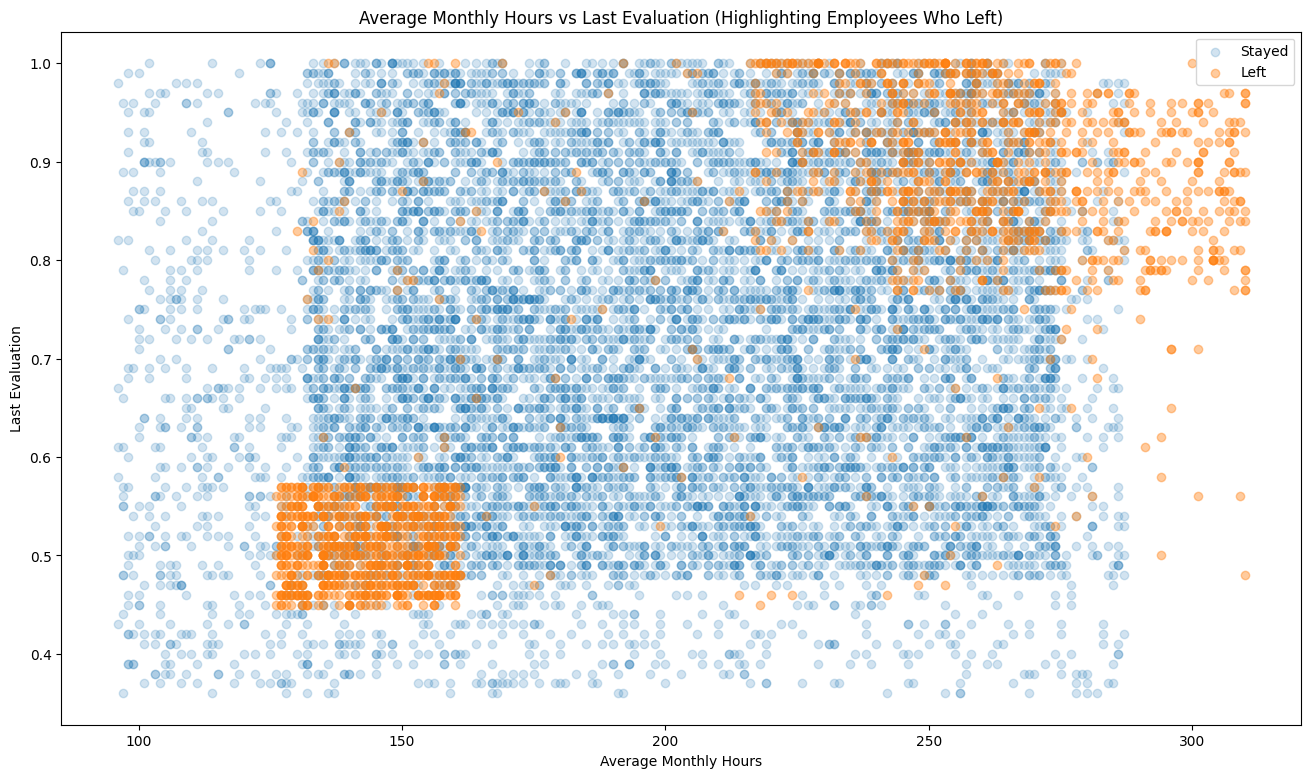

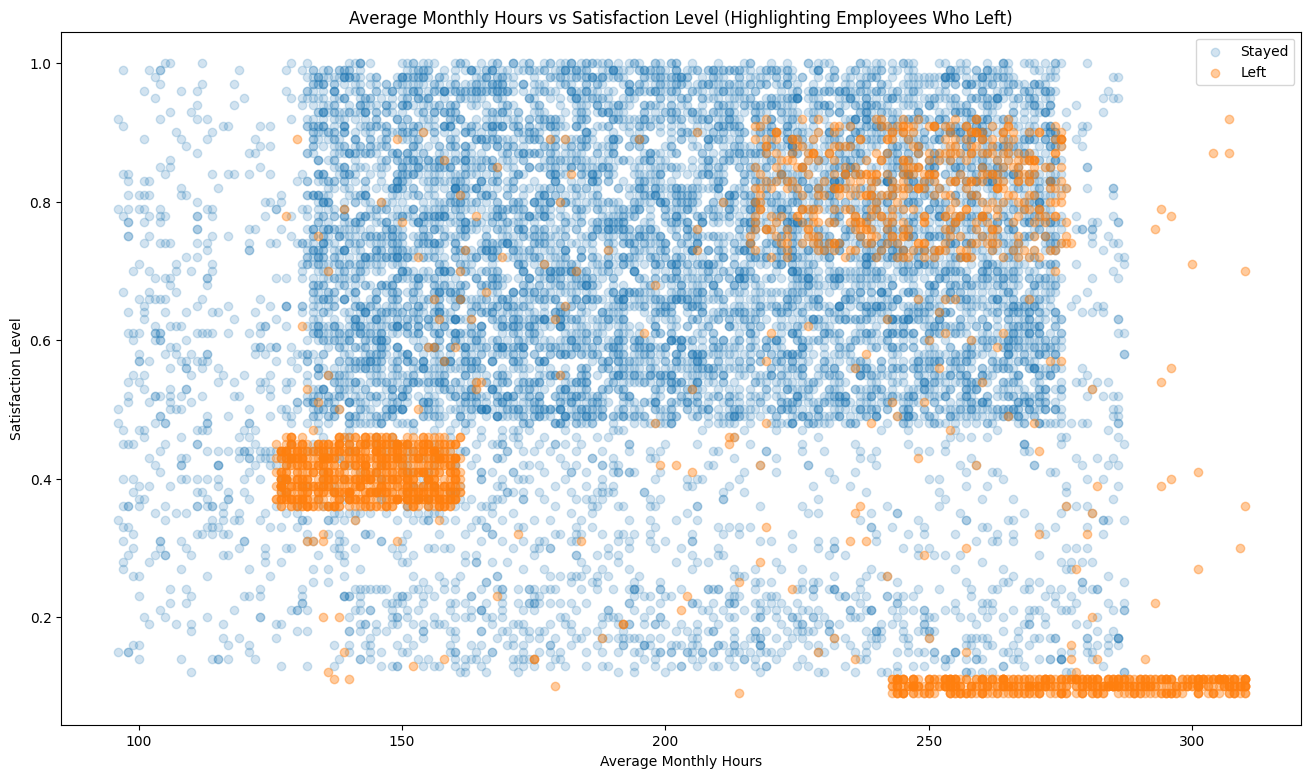

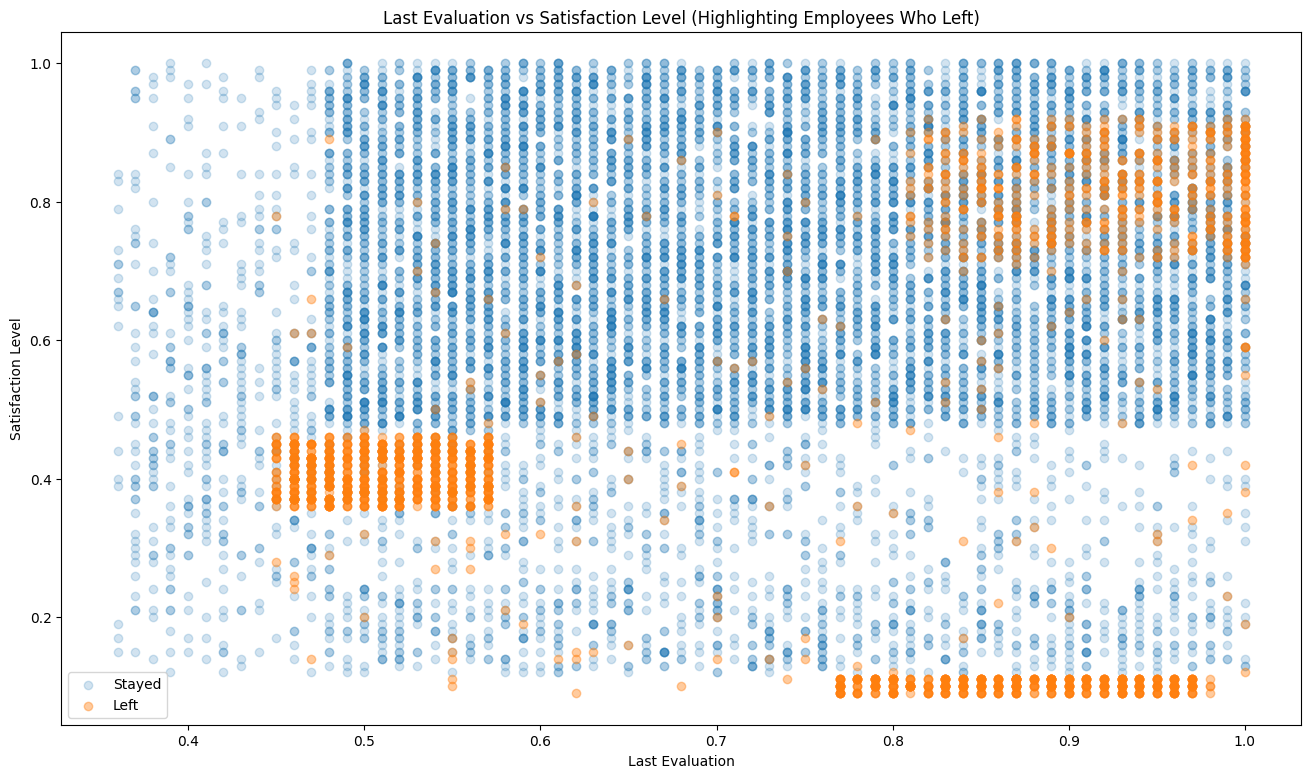

In [43]:
column_names = ['average_monthly_hours', 'last_evaluation', 'satisfaction_level']
column_titles = ['Average Monthly Hours', 'Last Evaluation', 'Satisfaction Level']

for index_X in range(len(column_names)):
  for index_Y in range(index_X + 1, len(column_names)):
    scatter_plot_comparison(df1, column_names[index_X], column_names[index_Y], column_titles[index_X], column_titles[index_Y])


### Insights from Scatterplots

- **Average Monthly Hours vs Last Evaluation**: A noticeable cluster of employees with 130-160 hours and evaluation scores between 0.45 and 0.55 have left.
- **Average Monthly Hours vs Satisfaction Level**: Employees working over 240 hours monthly with very low satisfaction (0-0.1) form a distinct group that left. Another cluster with 130-160 hours and satisfaction between 0.35-0.45 also shows higher attrition.
- **Last Evaluation vs Satisfaction Level**: Two clusters stand out linked to attrition—one with high evaluation scores (0.75-1) but very low satisfaction, and another with moderate evaluation (0.45-0.55) and mid-low satisfaction (0.35-0.45).

These clusters suggest complex interactions where both workload and employee sentiment combined with performance evaluations influence departure likelihood.


### Correlation Heatmap Analysis

To quantify relationships between variables, especially with employee attrition (left), a correlation matrix heatmap is generated.

This visual helps identify which features are most strongly associated with employees leaving the company, and also shows relations among other features.

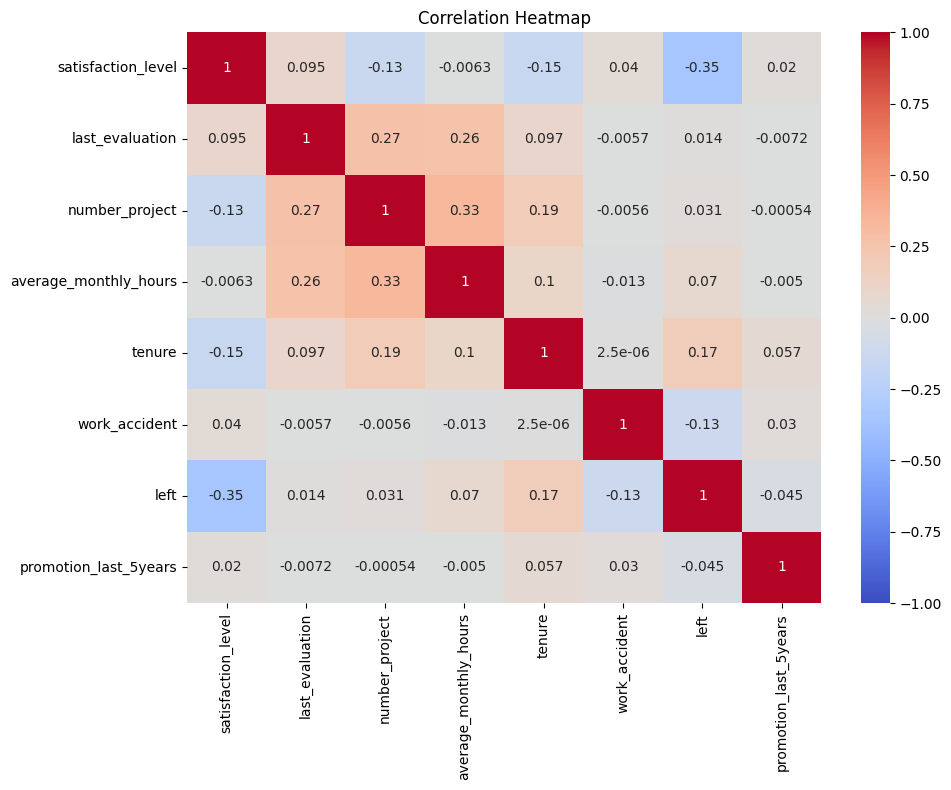

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df1.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Correlation Insights

- **Satisfaction Level** shows the strongest negative correlation with attrition (left) at approximately -0.35, indicating that lower satisfaction relates to higher likelihood of leaving.
- **Tenure** has a moderate positive correlation (~0.17) with attrition.
- Other variables exhibit weaker correlations with left.
- Notably, **Number of Projects** correlates strongly with **Average Monthly Hours** (0.33), reflecting logical work intensity relationships.
- **Last Evaluation** is moderately correlated with both **Number of Projects** (0.27) and **Average Monthly Hours** (0.26), suggesting higher performance scores tend to be associated with more projects and hours worked.

### Clustering Analysis Setup

Focusing on employees who left the company (left == 1), clustering is performed to identify natural groupings within this subgroup.

We select features most relevant to attrition based on prior analysis:

- Last Evaluation
- Number of Projects
- Tenure
- Average Monthly Hours
- Satisfaction Level

These features are standardized to ensure equal scaling before clustering.

### Data Preparation for Clustering

The subset of employees who left is isolated, and the selected features are scaled using StandardScaler. 

Scaling is important to prevent features with larger numeric ranges from dominating the clustering process.

In [17]:
from sklearn.preprocessing import StandardScaler

df_left = df1[df1['left'] == 1].copy()
cluster_features = ['last_evaluation', 'number_project', 'tenure', 'average_monthly_hours', 'satisfaction_level']
df_cluster = df_left[cluster_features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

### Determining Optimal Number of Clusters with KMeans

We use KMeans to find clusters of employees who left. To find the best number of clusters (k) for grouping employees, we use:

- Elbow Method: Plots inertia (sum of squared distances) for different k values to find the "elbow" point where adding more clusters has diminishing returns.
- Silhouette Score: Measures how well-separated clusters are, with higher scores indicating better-defined clusters.

We test k values from 2 to 9.

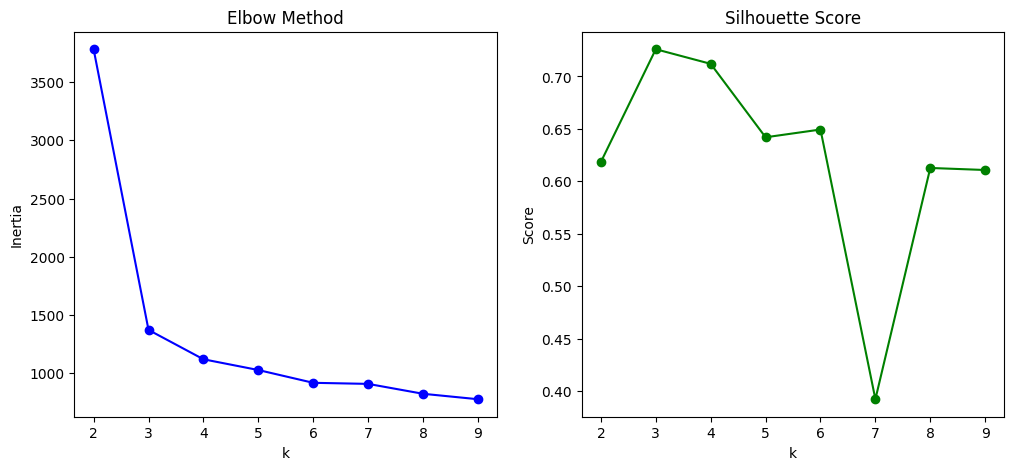

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, 'go-')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.show()

### Interpretation of Results

The plots indicate an optimal k of 3 clusters, shown by the clear elbow point and the highest silhouette score.

This suggests the data naturally groups into three distinct clusters within employees who left.

### Clustering Results: Cluster Profiles

Using the optimal number of clusters (k=3), we fit the K-Means model and assign cluster labels to each employee who left.

Next, we calculate the mean value of each feature within each cluster to understand the typical profile of employees in each group.

In [19]:
final_k = 3  # best value from elbow/silhouette
kmeans = KMeans(n_clusters=final_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)
df_left['cluster'] = labels

# Profiling
cluster_profiles = df_left.groupby('cluster')[cluster_features].mean()
print(cluster_profiles)

         last_evaluation  ...  satisfaction_level
cluster                   ...                    
0               0.524309  ...            0.414619
1               0.860917  ...            0.119982
2               0.911959  ...            0.805841

[3 rows x 5 columns]


### Visualizing Clusters with PCA

To better understand the cluster separation, we reduce the 5-dimensional feature space to 2 principal components using PCA.

The scatterplot shows the employees colored by their assigned cluster, helping to visually assess cluster compactness and overlap.

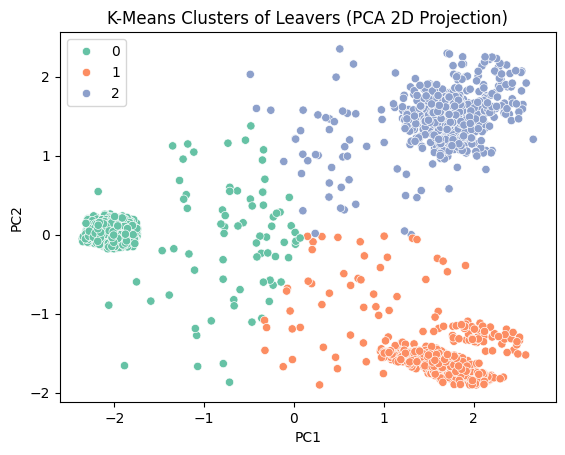

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.title("K-Means Clusters of Leavers (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Outlier Detection for Clustering

The PCA plot reveals some points far from the main clusters, likely outliers.

To improve cluster interpretability, the next step filters points based on their distance to cluster centroids, identifying core cluster members.

### Filtering Core Points Based on Distance to Centroid

To reduce the influence of outliers and better define the cluster structure, we keep only the 90% of points closest to their cluster centroid.

This step allows us to focus on the core members of each cluster and obtain more representative profiles.

In [21]:
# Get centroids
centroids = kmeans.cluster_centers_

# Compute distances of each point to its assigned cluster's centroid
distances = np.linalg.norm(df_scaled - centroids[labels], axis=1)

# Add distances to DataFrame
df_left['distance_to_centroid'] = distances

core_points = []

for cluster in range(final_k):
    cluster_mask = df_left['cluster'] == cluster
    cluster_distances = df_left.loc[cluster_mask, 'distance_to_centroid']
    threshold = cluster_distances.quantile(0.9)
    core_mask = cluster_mask & (df_left['distance_to_centroid'] <= threshold)
    core_points.append(df_left.loc[core_mask])

# Concatenate all core points
df_cores = pd.concat(core_points)

# Get descriptive statistics
core_profiles = df_cores.groupby('cluster')[cluster_features].mean()
print(core_profiles)


         last_evaluation  ...  satisfaction_level
cluster                   ...                    
0               0.511497  ...            0.408687
1               0.872408  ...            0.101592
2               0.923326  ...            0.818275

[3 rows x 5 columns]


### Visualizing Core Clusters After Filtering

We apply PCA again to the filtered core points and plot them, revealing tighter and more distinct clusters.

Filtering out distant points improves cluster cohesion and interpretability.

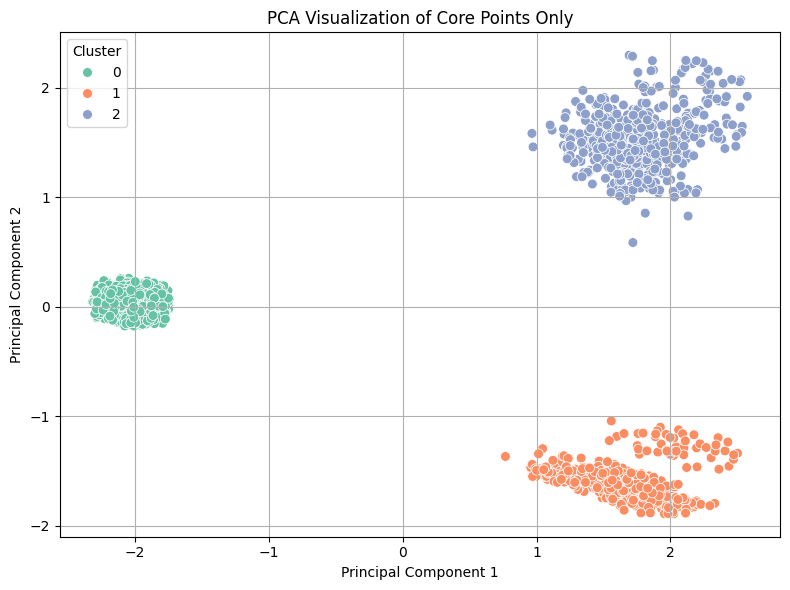

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Re-standardize just in case
X_cores = df_cores[cluster_features]
X_cores_scaled = scaler.transform(X_cores)

# Apply PCA to core points
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cores_scaled)

# Add PCA coordinates for plotting
df_cores['pca1'] = X_pca[:, 0]
df_cores['pca2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cores, x='pca1', y='pca2', hue='cluster', palette='Set2', s=50)
plt.title("PCA Visualization of Core Points Only")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


### Summary Statistics for Core Clusters

We calculate cluster size and min-max for each feature to better understand the range and distribution of key features per group.

This detailed profile highlights distinct behavioral patterns among employees who left.

In [23]:
agg_funcs = {feature: ['min', 'max'] for feature in cluster_features}

# Group by cluster and compute min and max
summary = df_cores.groupby('cluster').agg(agg_funcs)

# Count the number of rows per cluster separately
counts = df_cores['cluster'].value_counts().sort_index()
summary['cluster_size'] = counts

summary


last_evaluation        ... satisfaction_level cluster_size
                    min   max  ...                max             
cluster                        ...                                
0                  0.45  0.57  ...               0.46          815
1                  0.74  0.98  ...               0.11          490
2                  0.78  1.00  ...               0.92          487

[3 rows x 11 columns]

### Interpretation of Cluster Profiles

- **Cluster 0** (815 employees - 41% of all the employees who left) represents employees with moderate evaluation scores, fewer projects, shorter tenure, moderate monthly hours, and medium satisfaction.
- **Cluster 1** (490 employees - 25% of all the employees who left) is characterized by high workload and evaluations but very low satisfaction, suggesting burnout or dissatisfaction despite strong performance.
- **Cluster 2** (487 emplyees - 24% of all the employees who left)shows similar workload and evaluation levels to Cluster 1 but with high satisfaction, possibly indicating a different reason for leaving.

This profiling may be helpful to easily understand the most common reasons for an employee to leave the company.

### Model Preparation: Imports

We now begin the modeling phase by importing the necessary libraries for statistical and machine learning analysis. We'll use classification models to predict whether an employee is likely to leave the company.

In [24]:
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### Data Preprocessing: Categorical Variables

We transform categorical variables into numerical format to make them compatible with ML models. The salary column is ordinal, so we encode it explicitly. Then department is one-hot encoded.

In [25]:
df_reg = df1.copy()

df_reg['salary'] = df_reg['salary'].astype('category').cat.set_categories(['low', 'medium', 'hihgh']).cat.codes
df_reg = pd.get_dummies(df_reg, drop_first=False)
df_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


### Defining Predictor and Target Variables

We separate the target variable left from the rest of the dataset to prepare for model training. We are going to use every available feature for the following steps.

In [26]:
y = df_reg['left']
X = df_reg.drop('left', axis=1)

### Train-Test Split

We split the data into training and test sets (75/25 split), stratifying by the target to preserve class distribution across splits.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Model Evaluation Function

We define a helper function evaluate_model to assess the performance of different classifiers using a consistent framework. It outputs a confusion matrix and a classification report (precision, recall, f1-score, support and accuracy).

In [34]:
def evaluate_model(y_true, y_pred):
  confussion_matrix = confusion_matrix(y_true, y_pred)
  ConfusionMatrixDisplay(confussion_matrix, display_labels=['Stay', 'Left']).plot()
  plt.show()
  print(classification_report(y_true, y_pred))

### Logistic Regression

We start with a **Logistic Regression** model as a baseline classifier to predict if an employee is likely to leave the company.

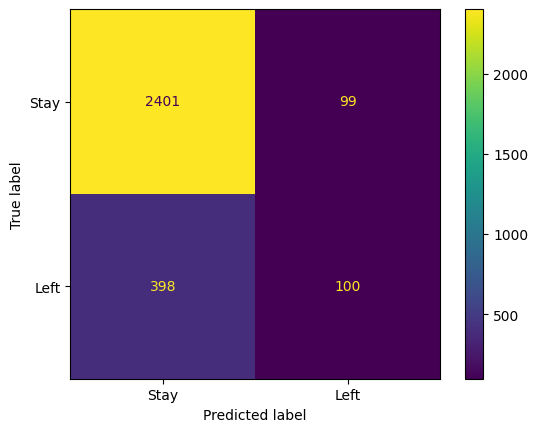

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2500
           1       0.50      0.20      0.29       498

    accuracy                           0.83      2998
   macro avg       0.68      0.58      0.60      2998
weighted avg       0.80      0.83      0.80      2998



In [36]:
logistic_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)
evaluate_model(y_test, y_pred)

### Evaluation

For the evaluation we are focusing mainly on how well the model predicts the Left class (left == 1), because these are the employees we aim to proactively retain by identifying them before they leave. A model that fails to detect potential leavers is not useful, even if it has high overall accuracy.
From the confusion matrix and the classification report we can see that:
 - The model only predicted 100 of the 498 employees who left, **recall = 0.20**.
 - It predicted that 199 employees left and only 100 truly left, **precision = 0.50**.
 - For the Stay class it worked really well, precision = 0.86 and recall = 0.96, but we are focusing on the Left class.
 - **Overall accuracy is 83%**, but that's misleading because of the class imbalance, the good performance on the Stay class hides the poor performance on the Left class.

This model's performance—particularly on the Left class—is not good enough to be used in a real scenario.

### Decision Tree Classifier

We now train a **Decision Tree Classifier**, tuning hyperparameters using grid search with 5-fold cross-validation, optimizing for F1-score.

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


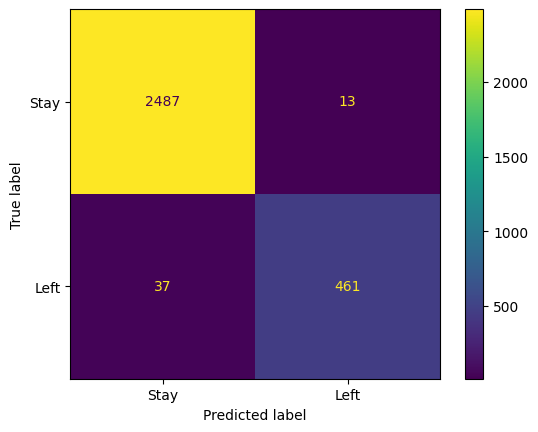

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.97      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [39]:
tree = DecisionTreeClassifier(random_state=42)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }
scoring = ['accuracy', 'precision', 'recall', 'f1']
tree_clf_cv = GridSearchCV(tree, cv_params, scoring=scoring, refit='f1', cv=5)

tree_clf_cv.fit(X_train, y_train)
print(tree_clf_cv.best_params_)

y_pred = tree_clf_cv.predict(X_test)
evaluate_model(y_test, y_pred)

### Evaluation

From the confusion matrix and the classification report we can see that:
 - The model correctly predicted 461 of the 498 employees who left, **recall = 0.93**.
 - It predicted that 474 employees left of which 461 really left, **precision = 0.97**.
 - For the Stay class it also worked very well, precision = 0.99 and recall = 0.99, which is good even though we are not focusing on that class
 - **Overall accuracy is 98%.**

The Decision Tree Classifier significantly improves over the Logistic Regression Classifier in predicting employee attrition. It provides a strong balance between precision and recall for the Left class, making it highly effective for our primary goal: detecting employees likely to leave the company.

### Random Forest Classifier

We now train a **Random Forest Classifier**, tuning hyperparameters using grid search with 5-fold cross-validation, optimizing for F1-score.

{'max_depth': None, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


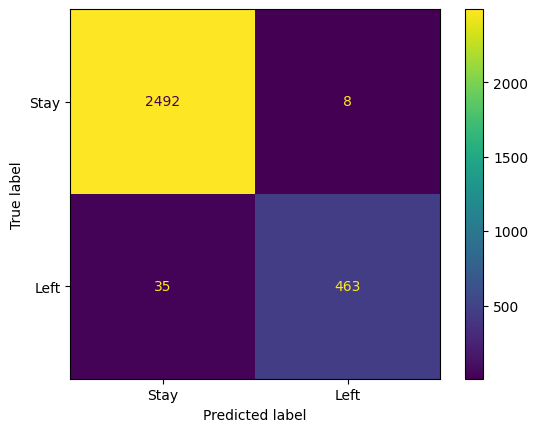

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.98      0.93      0.96       498

    accuracy                           0.99      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998

CPU times: total: 20min 3s
Wall time: 20min 52s


In [40]:
%%time
forest = RandomForestClassifier(random_state=42)
cv_params = {'max_depth': [3, 5, None],
             'max_features': [0.7, 1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 3],
             'min_samples_split': [2, 4],
             'n_estimators': [300, 500],
             }
scoring = ['accuracy', 'precision', 'recall', 'f1']
forest_clf_cv = GridSearchCV(forest, cv_params, scoring=scoring, refit='f1', cv=5)

forest_clf_cv.fit(X_train, y_train)
print(forest_clf_cv.best_params_)
y_pred = forest_clf_cv.predict(X_test)
evaluate_model(y_test, y_pred)

### Evaluation

From the confusion matrix and the classification report we can see that:
 - The model correctly predicted 463 of the 498 employees who left, **recall = 0.93**.
 - It predicted that 471 employees left of which 463 really left, **precision = 0.98**.
 - For the Stay class it also worked very well, precision = 0.99 and recall = 1, which is good even though we are not focusing on that class
 - **Overall accuracy is 99%.**

The Random Forest Classifier slightly improves over the Decision Tree Classifier.

### XGBoost Classifier

We finally train a **XGBoost Classifier**, tuning hyperparameters using grid search with 5-fold cross-validation, optimizing for F1-score.

{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}


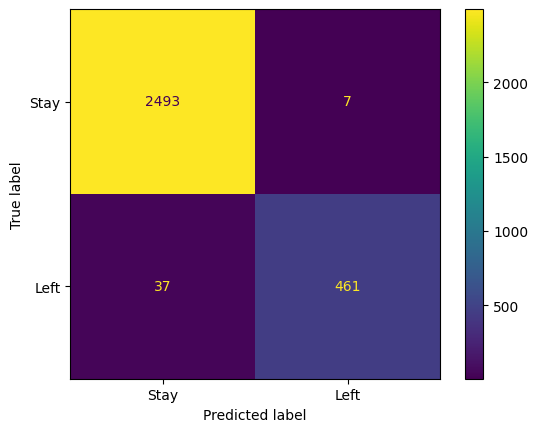

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.99      0.93      0.95       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998

CPU times: total: 9min 43s
Wall time: 1min 30s


In [41]:
%%time
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
cv_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 150, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}
xgb_clf_cv = GridSearchCV(xgb, cv_params, scoring=scoring, refit='f1', cv=5)

xgb_clf_cv.fit(X_train, y_train)
print(xgb_clf_cv.best_params_)
y_pred = xgb_clf_cv.predict(X_test)
evaluate_model(y_test, y_pred)

### Evaluation

From the confusion matrix and the classification report we can see that:
 - The model correctly predicted 461 of the 498 employees who left, **recall = 0.93**.
 - It predicted that 468 employees left of which 461 really left, **precision = 0.99**.
 - For the Stay class it also worked very well, precision = 0.99 and recall = 1, which is good even though we are not focusing on that class
 - **Overall accuracy is 99%.**

The XGBoost Classifier performs almost equally to Decision Tree Classifier, with both of them being highly suitable for deployment if predictive power is priority.

### Model Selection Summary

**Evaluation table:**
                      Left-precision   Left-recall   accuracy
Logistic Regression             0.50          0.20       0.83
Decision Tree                   0.97          0.93       0.98
Random Forest                   0.98          0.93       0.99
XGBoost                         0.99          0.93       0.99

Based on the results of the evaluation:

- **Logistic Regression** is **not recommended** for this case. Its performance—particularly on the "Left" class—is significantly worse than the other models, with low precision and recall.
  
- **Decision Tree** is a **strong option when model interpretability is important**. It performs well overall and allows clear explanation of predictions through decision paths and feature splits, making it suitable for stakeholder communication or policy-driven scenarios.

- **Random Forest** and **XGBoost** both achieved **exceptional predictive performance**, with near-perfect accuracy, precision, and recall. Either is an excellent choice when **predictive power is the top priority**.

Overall, **XGBoost or Random Forest** are recommended for deployment when the goal is to accurately identify employees at risk of leaving.